In [12]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns


def predict(X, w):
    return np.matmul(X, w)


def loss(X, Y, w):
    return np.average((predict(X, w) - Y) ** 2)


def gradient(X, Y, w):
    return 2 * (np.matmul(X.T, (predict(X, w) - Y))) / X.shape[0]


def train(X, Y, iter, lr):
    w = np.zeros((X.shape[1], 1))
    for i in range(iter):
        print("Iteration %4d => Loss: %.20f" % (i, loss(X, Y, w)))
        w -= gradient(X, Y, w) * lr
    return w


data = np.loadtxt('life-expectancy-without-country-names.txt', skiprows=1)
X = data[:, :-1]
X = np.hstack([np.ones((X.shape[0], 1)), X])
Y = data[:, -1].reshape(-1, 1)

print(X.shape)
print(Y.shape)

w = train(X, Y, iter=50000, lr=0.0001)

(167, 4)
(167, 1)
Iteration    0 => Loss: 5148.41185360395593306748
Iteration    1 => Loss: 3235.55091165184740020777
Iteration    2 => Loss: 2041.87377112154490532703
Iteration    3 => Loss: 1296.87126159225840638101
Iteration    4 => Loss: 831.80092696140832231322
Iteration    5 => Loss: 541.39875409119906635169
Iteration    6 => Loss: 359.99684973918056130060
Iteration    7 => Loss: 246.62674383666094968248
Iteration    8 => Loss: 175.72743974809259270842
Iteration    9 => Loss: 131.34941448978884181997
Iteration   10 => Loss: 103.53922121568797365398
Iteration   11 => Loss: 86.08425313668719525140
Iteration   12 => Loss: 75.10592201480093876853
Iteration   13 => Loss: 68.18204987356072876992
Iteration   14 => Loss: 63.79937154535650023490
Iteration   15 => Loss: 61.01195678492182139507
Iteration   16 => Loss: 59.22808622781101206556
Iteration   17 => Loss: 58.07726049113832544890
Iteration   18 => Loss: 57.32720098832210453565
Iteration   19 => Loss: 56.83204047531999236753
Iterati

In [17]:
print("Weights: %s" % w.T)
print("A few predictions:")
for i in range(10):
    print("X[%d] -> %.4f (label: %.2f)" % (i, predict(X[i], w).item(), Y[i].item()))

Weights: [[6.61493096 0.0548485  0.73998444 0.64724206]]
A few predictions:
X[0] -> 74.9189 (label: 76.25)
X[1] -> 76.0303 (label: 74.25)
X[2] -> 78.6369 (label: 82.56)
X[3] -> 80.5338 (label: 81.25)
X[4] -> 68.4105 (label: 71.80)
X[5] -> 76.7855 (label: 75.38)
X[6] -> 78.3341 (label: 76.62)
X[7] -> 69.2669 (label: 71.80)
X[8] -> 77.5062 (label: 75.60)
X[9] -> 76.4526 (label: 72.50)


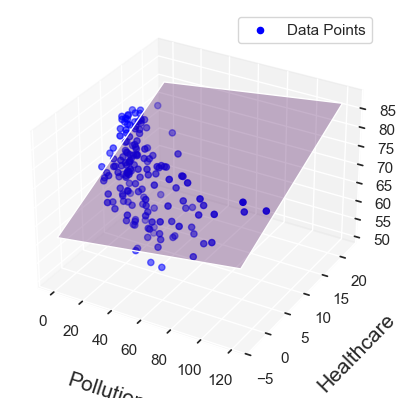

In [14]:
x1 = X[:, 1]  # Pollution
x2 = X[:, 2]  # Healthcare
z = Y[:, 0]  # Life (flattened for plotting)

# Plot the axes
sns.set(rc={"axes.facecolor": "white", "figure.facecolor": "white"})
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.set_xlabel("Pollution", labelpad=15, fontsize=15)
ax.set_ylabel("Healthcare", labelpad=15, fontsize=15)
ax.set_zlabel("Life Expectancy", labelpad=10, fontsize=15)

# Plot the data points
ax.scatter3D(x1, x2, z, color='blue', label='Data Points')

# Plot the regression plane
MARGIN = 5
edges_x1 = np.linspace(np.min(x1) - MARGIN, np.max(x1) + MARGIN, 2)
edges_x2 = np.linspace(np.min(x2) - MARGIN, np.max(x2) + MARGIN, 2)
xs1, xs2 = np.meshgrid(edges_x1, edges_x2)

# Calculate zs using the model: z = w0 + w1*x2 + w2*x1
zs = w[0] + w[1] * xs1 + w[2] * xs2 + w[3] * np.mean(X[:, 3])  # Keep 'Water' constant for 3D plot

ax.plot_surface(xs1, xs2, zs, alpha=0.3, cmap=cm.viridis)
ax.legend()
plt.show()